In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tpl

In [2]:
from scipy.stats import norm
from scipy.special import gamma as gamma_func
from scipy.integrate import quad
np.random.seed(42)

# Gamma Distribution Laplace Propagation

In [3]:
# functions

def gamma_pdf(x, a, l):
    r = l**a/gamma_func(a) * (x ** (a-1)) * (np.exp(-x*l))
    return(r)

def gamma_pdf_t_log(x, a, l):
    c = gamma_func(a) /l**a
    r = 1/c * (np.exp(x) ** a) * (np.exp(-np.exp(x) * l))
    return(r)

def gamma_pdf_t_sqrt(x, a, l):
    c = 1/2 * l**(-a-0.5) * gamma_func((2*a+1)/2)
    r = 1/c * (x**(2*a)) * (np.exp(- (x**2) * l))
    return(r)

def gamma_mode(a, l):
    return((a-1)/l)

def gamma_var(a,l):
    return((a-1)/l**2)

"""Transforms: log"""

def gamma_t_log_mode(a, l):
    return(np.log(a/l))


def gamma_t_log_var(a):
    return(1/a)

def log_normal_back(x, mu, sigma):
    x_ = np.log(x)
    return(norm.pdf(x_, mu, sigma) * 1/x)


"""Transforms: sqrt"""

def gamma_t_sqrt_mode(a, l):
    return(np.sqrt((a-0.5)/l))

def gamma_t_sqrt_var(l):
    return(1/(4*l))

def sqrt_normal_back(x, mu, sigma):
    x_ = np.sqrt(x)
    return(norm.pdf(x_, mu, sigma) * 0.5 * 1/np.sqrt(x))

## log basis

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in true_divide
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


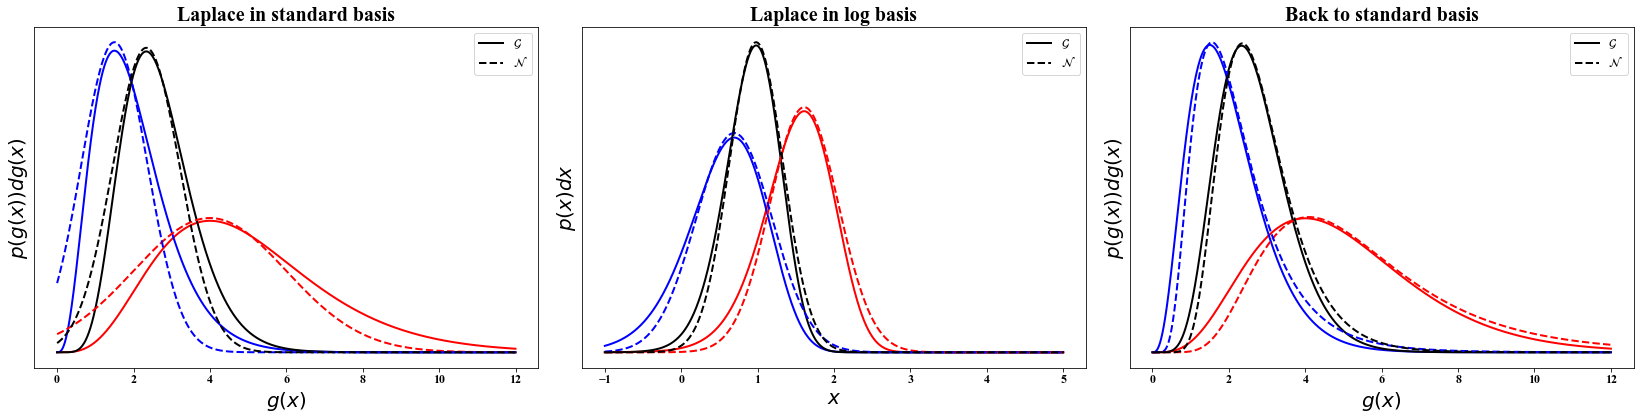

In [4]:
#change the basis, i.e. x -> t(x)

#######EXPONENTIAL BASIS TRANSFORM########
#exp transform <-> log basis

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3

#normal
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(gamma_var(a1, l1))
sigma2 = np.sqrt(gamma_var(a2, l2))
sigma3 = np.sqrt(gamma_var(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_t = np.linspace(-1, 5, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#transform

y1_t_log = gamma_pdf_t_log(x_t, a1, l1)
y2_t_log = gamma_pdf_t_log(x_t, a2, l2)
y3_t_log = gamma_pdf_t_log(x_t, a3, l3)
mode1_t_log = gamma_t_log_mode(a1, l1)
mode2_t_log = gamma_t_log_mode(a2, l2)
mode3_t_log = gamma_t_log_mode(a3, l3)

sigma1_t_log = np.sqrt(gamma_t_log_var(a1))
sigma2_t_log = np.sqrt(gamma_t_log_var(a2))
sigma3_t_log = np.sqrt(gamma_t_log_var(a3))
lp_approx1_t_log = norm.pdf(x_t, loc=mode1_t_log, scale=sigma1_t_log) 
lp_approx2_t_log = norm.pdf(x_t, loc=mode2_t_log, scale=sigma2_t_log) 
lp_approx3_t_log = norm.pdf(x_t, loc=mode3_t_log, scale=sigma3_t_log) 

#back transform
y1_back = log_normal_back(x, mode1_t_log, sigma1_t_log)
y2_back = log_normal_back(x, mode2_t_log, sigma2_t_log)
y3_back = log_normal_back(x, mode3_t_log, sigma3_t_log)

"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=2, alpha=1)#, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=2, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[0].plot(x, lp_approx1, 'r--', lw=2, alpha=1)#, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=2, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_log, 'r-', lw=2, alpha=1)#, label='gamma trans')
axs[1].plot(x_t, y2_t_log, 'b-', lw=2, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_log, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[1].plot(x_t, lp_approx1_t_log, 'r--', lw=2, alpha=1)#, label='lp approx trans')
axs[1].plot(x_t, lp_approx2_t_log, 'b--', lw=2, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_log, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in log basis', fontsize=20)
axs[1].legend();


#"""
axs[2].plot(x, y1, 'r-', lw=2)#, label="gamma");
axs[2].plot(x, y2, 'b-', lw=2)#, label="exponential");
axs[2].plot(x, y3, 'k-', lw=2, label="$\mathcal{G}$");
axs[2].plot(x, y1_back, 'r--', lw=2)#, label="back transform")
axs[2].plot(x, y2_back, 'b--', lw=2)#, label="back transform")
axs[2].plot(x, y3_back, 'k--', lw=2, label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();
#"""

plt.tight_layout()
plt.savefig('gamma_bridge_log.pdf')
#tpl.save('Gamma_Bridge_log.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
#         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
plt.show();

## sqrt basis

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


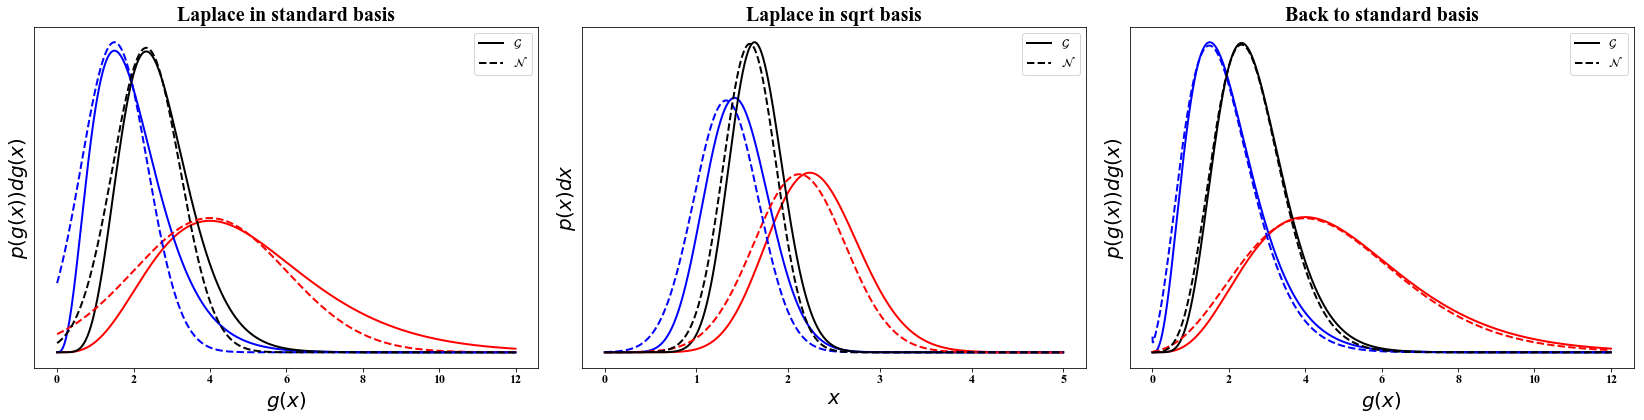

In [5]:
#change the basis, i.e. x -> t(x)

###########SQUARE###################
#square transform <-> sqrt basis

"""values"""

a1, l1 = 5,1
a2, l2 = 4,2
a3, l3 = 8,3

#normal
mode1 = gamma_mode(a1, l1)
mode2 = gamma_mode(a2, l2)
mode3 = gamma_mode(a3, l3)

sigma1 = np.sqrt(gamma_var(a1, l1))
sigma2 = np.sqrt(gamma_var(a2, l2))
sigma3 = np.sqrt(gamma_var(a3, l3))

x = np.linspace(0, 12, 12000 + 1)
x_t = np.linspace(0, 5, 5000 + 1)
y1 = gamma_pdf(x, a1, l1)
y2 = gamma_pdf(x, a2, l2)
y3 = gamma_pdf(x, a3, l3)
lp_approx1 = norm.pdf(x, loc=mode1, scale=sigma1)
lp_approx2 = norm.pdf(x, loc=mode2, scale=sigma2)
lp_approx3 = norm.pdf(x, loc=mode3, scale=sigma3)

#transform

y1_t_sqrt = gamma_pdf_t_sqrt(x_t, a1, l1)
y2_t_sqrt = gamma_pdf_t_sqrt(x_t, a2, l2)
y3_t_sqrt = gamma_pdf_t_sqrt(x_t, a3, l3)
mode1_t_sqrt = gamma_t_sqrt_mode(a1, l1)
mode2_t_sqrt = gamma_t_sqrt_mode(a2, l2)
mode3_t_sqrt = gamma_t_sqrt_mode(a3, l3)

sigma1_t_sqrt = np.sqrt(gamma_t_sqrt_var(l1))
sigma2_t_sqrt = np.sqrt(gamma_t_sqrt_var(l2))
sigma3_t_sqrt = np.sqrt(gamma_t_sqrt_var(l3))
lp_approx1_t_sqrt = norm.pdf(x_t, loc=mode1_t_sqrt, scale=sigma1_t_sqrt) 
lp_approx2_t_sqrt = norm.pdf(x_t, loc=mode2_t_sqrt, scale=sigma2_t_sqrt) 
lp_approx3_t_sqrt = norm.pdf(x_t, loc=mode3_t_sqrt, scale=sigma3_t_sqrt) 

#back transform
y1_back = sqrt_normal_back(x, mode1_t_sqrt, sigma1_t_sqrt)
y2_back = sqrt_normal_back(x, mode2_t_sqrt, sigma2_t_sqrt)
y3_back = sqrt_normal_back(x, mode3_t_sqrt, sigma3_t_sqrt)

"""Plots"""
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#first plot
axs[0].plot(x, y1, 'r-', lw=2, alpha=1)#, label='gamma a1 l1 pdf')
axs[0].plot(x, y2, 'b-', lw=2, alpha=1)#, label='gamma a2 l2 pdf')
axs[0].plot(x, y3, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[0].plot(x, lp_approx1, 'r--', lw=2, alpha=1)#, label='lp approx1 pdf')
axs[0].plot(x, lp_approx2, 'b--', lw=2, alpha=1)#, label='lp approx2 pdf')
axs[0].plot(x, lp_approx3, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlabel('$g(x)$', fontsize=20)
axs[0].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[0].set_title('Laplace in standard basis', fontsize=20)
axs[0].legend();

#second plot
axs[1].plot(x_t, y1_t_sqrt, 'r-', lw=2, alpha=1)#, label='gamma trans')
axs[1].plot(x_t, y2_t_sqrt, 'b-', lw=2, alpha=1)#, label='gamma trans a2 l2 pdf')
axs[1].plot(x_t, y3_t_sqrt, 'k-', lw=2, alpha=1, label='$\mathcal{G}$')
axs[1].plot(x_t, lp_approx1_t_sqrt, 'r--', lw=2, alpha=1)#, label='lp approx trans')
axs[1].plot(x_t, lp_approx2_t_sqrt, 'b--', lw=2, alpha=1)#, label='lp approx2 trans pdf')
axs[1].plot(x_t, lp_approx3_t_sqrt, 'k--', lw=2, alpha=1, label='$\mathcal{N}$')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xlabel('$x$', fontsize=20)
axs[1].set_ylabel('$p(x)dx$', fontsize=20)
axs[1].set_title('Laplace in sqrt basis', fontsize=20)
axs[1].legend();


#"""
axs[2].plot(x, y1, 'r-', lw=2)#, label="gamma");
axs[2].plot(x, y2, 'b-', lw=2)#, label="exponential");
axs[2].plot(x, y3, 'k-', lw=2, label="$\mathcal{G}$");
axs[2].plot(x, y1_back, 'r--', lw=2)#, label="back transform")
axs[2].plot(x, y2_back, 'b--', lw=2)#, label="back transform")
axs[2].plot(x, y3_back, 'k--', lw=2, label="$\mathcal{N}$")
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xlabel('$g(x)$', fontsize=20)
axs[2].set_ylabel('$p(g(x))dg(x)$', fontsize=20)
axs[2].set_title('Back to standard basis', fontsize=20)
axs[2].legend();
#"""

plt.tight_layout()
plt.savefig('gamma_bridge_sqrt.pdf')
#tpl.save('Gamma_Bridge_sqrt.tex', figure=fig, tex_relative_path_to_data='.figures', figurewidth='\\figwidth', figureheight='\\figheight',
#         extra_axis_parameters={'xtick align=inside', 'ytick align=inside', 'xtick pos=left', 'ytick pos=left', 'legend pos=north east'})
plt.show();

# Verify the Bridges

In [6]:
#verify the log bridge

def gamma_t_log_lambda(m,s): 
    return(1/(np.exp(m) * s**2))

def gamma_t_log_alpha(s):
    return(1/s**2)
    

test_a1, test_l1 = 3,4
test_m1, test_s1 = gamma_t_log_mode(test_a1, test_l1), np.sqrt(gamma_t_log_var(test_a1))
test_a2, test_l2 = gamma_t_log_alpha(test_s1), gamma_t_log_lambda(test_m1, test_s1)

print(test_a2, test_l2)

rand_a1, rand_l1 = np.random.random(), np.random.random()
rand_m1, rand_s1 = gamma_t_log_mode(rand_a1, rand_l1), np.sqrt(gamma_t_log_var(rand_a1))
rand_a2, rand_l2 = gamma_t_log_alpha(rand_s1), gamma_t_log_lambda(rand_m1, rand_s1)

assert(np.allclose(rand_a1, rand_a2))
assert(np.allclose(rand_l1, rand_l2))

3.0 4.0


In [7]:
#verify the sqrt bridge

def gamma_t_sqrt_lambda(s): 
    return(1/(4*s**2))

def gamma_t_sqrt_alpha(m, s):
    return(m**2/(4*s**2) + 0.5)
    
    

test_a3, test_l3 = 5,6
test_m3, test_s3 = gamma_t_sqrt_mode(test_a3, test_l3), np.sqrt(gamma_t_sqrt_var(test_l3))
test_a4, test_l4 = gamma_t_sqrt_alpha(test_m3, test_s3), gamma_t_sqrt_lambda(test_s3)

print(test_a4, test_l4)

rand_a3, rand_l3 = np.random.random()+1, np.random.random()+1
rand_m3, rand_s3 = gamma_t_sqrt_mode(rand_a3, rand_l3), np.sqrt(gamma_t_sqrt_var(rand_l3))
rand_a4, rand_l4 = gamma_t_sqrt_alpha(rand_m3, rand_s3), gamma_t_sqrt_lambda(rand_s3)

assert(np.allclose(rand_a3, rand_a4))
assert(np.allclose(rand_l3, rand_l4))

5.0 6.0


# Statistical distance measures

## starting with MMD for one set of parameters

In [8]:
# look at MMD
from torch_two_sample import MMDStatistic
from scipy.stats import norm, gamma
import torch

In [9]:
# set up samples with respective stats
# test in standard basis
n_samples = 5000

a1, l1 = 4, 3

mode1 = gamma_mode(a1, l1)

sigma1 = np.sqrt(gamma_var(a1, l1))

G_samples = gamma.rvs(a1, scale=1/l1, size=n_samples)
N_samples = norm.rvs(mode1, sigma1, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples = torch.Tensor(G_samples.reshape((n_samples, -1)))
N_samples = torch.Tensor(N_samples.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples, N_samples,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples, N_samples,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0331)


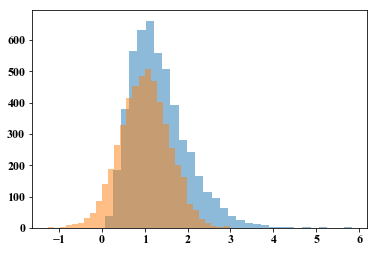

In [10]:
G_samples = G_samples.reshape(-1)
N_samples = N_samples.reshape(-1)
plt.hist(G_samples, bins = 30, alpha = 0.5)
plt.hist(N_samples, bins = 30, alpha = 0.5)
plt.show();

In [11]:
# set up samples with respective stats
# test in log basis

n_samples = 5000

a1, l1 = 4,3

mode1_log = gamma_t_log_mode(a1, l1)

sigma1_log = np.sqrt(gamma_t_log_var(a1))

G_samples_log = np.log(gamma.rvs(a1, scale=1/l1, size=n_samples))
N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples_log = torch.Tensor(G_samples_log.reshape((n_samples, -1)))
N_samples_log = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples_log, N_samples_log,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples_log, N_samples_log,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0059)


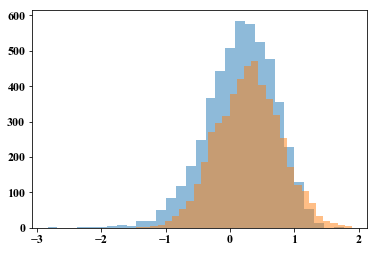

In [12]:
G_samples_log = G_samples_log.reshape(-1)
N_samples_log = N_samples_log.reshape(-1)
plt.hist(G_samples_log, bins = 30, alpha=0.5)
plt.hist(N_samples_log, bins = 30, alpha=0.5)
plt.show();

In [13]:
# set up samples with respective stats
# test in sqrt basis
n_samples = 5000

a1, l1 = 4,3

mode1_sqrt = gamma_t_sqrt_mode(a1, l1)

sigma1_sqrt = np.sqrt(gamma_t_sqrt_var(l1))

G_samples_sqrt = np.sqrt(gamma.rvs(a1, scale=1/l1, size=n_samples))
N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)

MMD_test = MMDStatistic(n_samples, n_samples)

G_samples_sqrt = torch.Tensor(G_samples_sqrt.reshape((n_samples, -1)))
N_samples_sqrt = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
#MMD_test_value, matrix = MMD_test(G_samples_sqrt, N_samples_sqrt,  alphas=[0.5], ret_matrix=True)
MMD_test_value = MMD_test(G_samples_sqrt, N_samples_sqrt,  alphas=[0.5], ret_matrix=False)

print(MMD_test_value)
#print(MMD_test.pval(matrix, n_permutations=100))

tensor(0.0007)


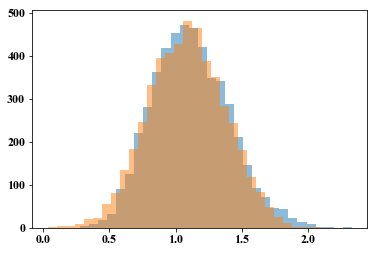

In [14]:
G_samples_sqrt = G_samples_sqrt.reshape(-1)
N_samples_sqrt = N_samples_sqrt.reshape(-1)
plt.hist(G_samples_sqrt, bins = 30, alpha=0.5)
plt.hist(N_samples_sqrt, bins = 30, alpha=0.5)
plt.show();

## MMD from 100 combinations of parameters

In [15]:
def MMD_combinations(plot=False, n_samples=1000, verbose=True):
    
    As = range(2, 12)
    Ls = range(1, 11)
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    MMD_sum = 0
    MMD_t_sqrt_sum = 0
    MMD_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
            
            #get samples from all dists
            #standard
            mode1 = gamma_mode(a1, l1)
            sigma1 = np.sqrt(gamma_var(a1, l1))
            G_samples = gamma.rvs(a1, scale=1/l1, size=n_samples)
            N_samples = norm.rvs(mode1, sigma1, size=n_samples)
            
            
            #log
            mode1_log = gamma_t_log_mode(a1, l1)
            sigma1_log = np.sqrt(gamma_t_log_var(a1))
            G_samples_log = np.log(G_samples)
            N_samples_log = norm.rvs(mode1_log, sigma1_log, size=n_samples)
            
            #sqrt
            mode1_sqrt = gamma_t_sqrt_mode(a1, l1)
            sigma1_sqrt = np.sqrt(gamma_t_sqrt_var(l1))
            G_samples_sqrt = np.sqrt(G_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma1_sqrt, size=n_samples)
            
            
            #calculate MMD for all bases
            MMD = MMDStatistic(n_samples, n_samples)
            
            #standard
            G_samples_ = torch.Tensor(G_samples.reshape((n_samples, -1)))
            N_samples_ = torch.Tensor(N_samples.reshape((n_samples, -1)))
            MMD_ = MMD(G_samples_, N_samples_,  alphas=[0.5], ret_matrix=False)
            
            #log
            G_samples_log_ = torch.Tensor(G_samples_log.reshape((n_samples, -1)))
            N_samples_log_ = torch.Tensor(N_samples_log.reshape((n_samples, -1)))
            MMD_log_= MMD(G_samples_log_, N_samples_log_,  alphas=[0.5], ret_matrix=False)
            
            #sqrt
            G_samples_sqrt_ = torch.Tensor(G_samples_sqrt.reshape((n_samples, -1)))
            N_samples_sqrt_ = torch.Tensor(N_samples_sqrt.reshape((n_samples, -1)))
            MMD_sqrt_ = MMD(G_samples_sqrt_, N_samples_sqrt_,  alphas=[0.5], ret_matrix=False)

            if plot:
                n_bins = int(np.sqrt(n_samples))
                fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
                axs[0].hist(G_samples, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[0].hist(N_samples, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[0].set_title('standard basis')
                axs[0].legend()
                
                axs[1].hist(G_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[1].hist(N_samples_log, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[1].set_title('log basis')
                axs[1].legend()
                
                axs[2].hist(G_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{G}$')
                axs[2].hist(N_samples_sqrt, bins = n_bins, alpha=0.5, label='$\mathcal{N}$')
                axs[2].set_title('sqrt basis')
                axs[2].legend()
                
                plt.show()

            #add them to their respective sums
            MMD_sum += MMD_
            MMD_t_log_sum += MMD_log_
            MMD_t_sqrt_sum += MMD_sqrt_
            
    return(MMD_sum.item(), MMD_t_log_sum.item(), MMD_t_sqrt_sum.item())

In [16]:
MMD_combinations(plot=False, verbose=True, n_samples=2000)

a:  2 l:  1
a:  2 l:  2
a:  2 l:  3
a:  2 l:  4
a:  2 l:  5
a:  2 l:  6
a:  2 l:  7
a:  2 l:  8
a:  2 l:  9
a:  2 l:  10
a:  3 l:  1
a:  3 l:  2
a:  3 l:  3
a:  3 l:  4
a:  3 l:  5
a:  3 l:  6
a:  3 l:  7
a:  3 l:  8
a:  3 l:  9
a:  3 l:  10
a:  4 l:  1
a:  4 l:  2
a:  4 l:  3
a:  4 l:  4
a:  4 l:  5
a:  4 l:  6
a:  4 l:  7
a:  4 l:  8
a:  4 l:  9
a:  4 l:  10
a:  5 l:  1
a:  5 l:  2
a:  5 l:  3
a:  5 l:  4
a:  5 l:  5
a:  5 l:  6
a:  5 l:  7
a:  5 l:  8
a:  5 l:  9
a:  5 l:  10
a:  6 l:  1
a:  6 l:  2
a:  6 l:  3
a:  6 l:  4
a:  6 l:  5
a:  6 l:  6
a:  6 l:  7
a:  6 l:  8
a:  6 l:  9
a:  6 l:  10
a:  7 l:  1
a:  7 l:  2
a:  7 l:  3
a:  7 l:  4
a:  7 l:  5
a:  7 l:  6
a:  7 l:  7
a:  7 l:  8
a:  7 l:  9
a:  7 l:  10
a:  8 l:  1
a:  8 l:  2
a:  8 l:  3
a:  8 l:  4
a:  8 l:  5
a:  8 l:  6
a:  8 l:  7
a:  8 l:  8
a:  8 l:  9
a:  8 l:  10
a:  9 l:  1
a:  9 l:  2
a:  9 l:  3
a:  9 l:  4
a:  9 l:  5
a:  9 l:  6
a:  9 l:  7
a:  9 l:  8
a:  9 l:  9
a:  9 l:  10
a:  10 l:  1
a:  10 l:  2
a:  10

(3.1491711139678955, 0.6582494378089905, 0.10150337219238281)

In [17]:
results_MMD = np.array([3.220231056213379, 0.6324171423912048, 0.10259640216827393])
results_MMD_normed = results_MMD/results_MMD[0]
print(results_MMD_normed)

[1.         0.19638875 0.03185995]


## KL-divergence (mode seeking/backward, from PDF)

In [18]:
def normal_pdf(x, mu, sigma):
    return(1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)**2/sigma**2)))

In [19]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_pdf(x_linspace, pdf_1, pdf_2, plot=False):
    
    pdf_1[pdf_1 < 1e-6] = 1e-6
    pdf_2[pdf_2 < 1e-6] = 1e-6
    
    #calculate KL_div
    KL_div = (pdf_1 * np.log(pdf_1 / pdf_2))

    if plot:
        plt.plot(x_linspace, pdf_1, label='pdf_1')
        plt.plot(x_linspace, pdf_2, label='pdf_2')
        plt.plot(x_linspace, KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(KL_div)
        
    return(KL_div)

In [20]:
def adjust_dist(a, l, base='standard'):
    
    #base can be any of "standard", "sqrtm" or "log"
    
    if base == "log":
        x_large = np.linspace(-1000, 1000, 2000)
    else:
        x_large = np.linspace(0.0001, 1000, 1000)
        
    if base == "standard":
        
        mode = gamma_mode(a, l)
        sigma = np.sqrt(gamma_var(a, l))
        
        #get the range of x
        G_pdf_large = gamma_pdf(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode, sigma)
        upper = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode, sigma)
        
        return(x_plus, G_pdf, N_pdf)
    
    if base == "sqrt":
        
        mode_sqrt = gamma_t_sqrt_mode(a, l)
        sigma_sqrt = np.sqrt(gamma_t_sqrt_var(l))
        
        #get the range of x
        G_pdf_large = gamma_pdf_t_sqrt(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_sqrt, sigma_sqrt)
        upper = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        x_plus = np.linspace(0.0001, upper, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf_t_sqrt(x_plus, a, l)
        N_pdf = normal_pdf(x_plus, mode_sqrt, sigma_sqrt)
        
        return(x_plus, G_pdf, N_pdf)
    
    if base == "log":
        
        mode_log = gamma_t_log_mode(a, l)
        sigma_log = np.sqrt(gamma_t_log_var(a))
        
        #get the range of x
        G_pdf_large = gamma_pdf_t_log(x_large, a, l)
        N_pdf_large = normal_pdf(x_large, mode_log, sigma_log)
        range_ = np.max([np.sum(G_pdf_large > 1e-6), np.sum(N_pdf_large > 1e-6)])
        lower = mode_log - range_/2
        upper = mode_log + range_/2
        x = np.linspace(lower, upper, 1000)
        
        #now do the actual pdfs
        G_pdf = gamma_pdf_t_log(x, a, l)
        N_pdf = normal_pdf(x, mode_log, sigma_log)
        
        return(x, G_pdf, N_pdf)
        
        
        

In [21]:
x, G_pdf, N_pdf = adjust_dist(5,1, 'standard')
x_sqrt, G_pdf_sqrt, N_pdf_sqrt = adjust_dist(5,1, 'sqrt')
x_log, G_pdf_log, N_pdf_log = adjust_dist(5,1, 'log')

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater


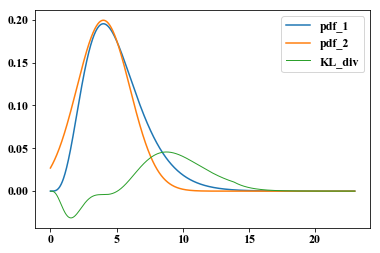

8.739299033973179

In [22]:
KL_divergence_pdf(x, G_pdf, N_pdf, plot=True)

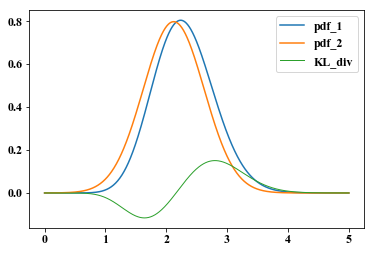

12.666583026301705

In [23]:
KL_divergence_pdf(x_sqrt, G_pdf_sqrt, N_pdf_sqrt, plot=True)

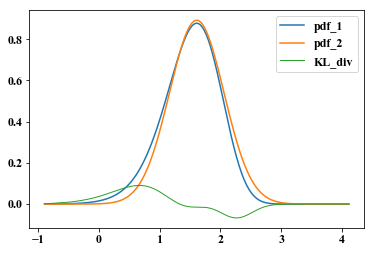

9.19626825930788

In [24]:
KL_divergence_pdf(x_log, G_pdf_log, N_pdf_log, plot=True)

In [25]:
def KL_div_pdf_combinations(plot=False, verbose=True):
    
    As = range(2, 12)
    Ls = range(1, 11)
    #As = [5,4,8]
    #Ls = [1, 2, 3]

    KL_div_sum = 0
    KL_div_t_sqrt_sum = 0
    KL_div_t_log_sum = 0 

    for a in As:
        for l in Ls:
            
            if verbose:
                print("a: ", a, "l: ", l)
            
            #get the ranges and pdfs
            x, G_pdf, N_pdf = adjust_dist(a,l, 'standard')
            x_sqrt, G_pdf_sqrt, N_pdf_sqrt = adjust_dist(a,l, 'sqrt')
            x_log, G_pdf_log, N_pdf_log = adjust_dist(a,l, 'log')
            
            #calculate the KL divergences for all bases
            KL_div_ = KL_divergence_pdf(x, G_pdf, N_pdf, plot=plot)
            KL_div_log_ = KL_divergence_pdf(x_log, G_pdf_log, N_pdf_log, plot=plot)
            KL_div_sqrt_ = KL_divergence_pdf(x_sqrt, G_pdf_sqrt, N_pdf_sqrt, plot=plot) 
            
            #add them to their respective sums
            KL_div_sum += KL_div_
            KL_div_t_log_sum += KL_div_log_
            KL_div_t_sqrt_sum += KL_div_sqrt_
            
            
    return(KL_div_sum, KL_div_t_log_sum, KL_div_t_sqrt_sum)

In [26]:
print(KL_div_pdf_combinations(plot=False, verbose=False))

(5532.063818400539, 815.4892931828754, 2248.595138420037)


/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in power
  if __name__ == '__main__':


In [27]:
results_KL_pdf = np.array([5532.063818400539, 815.4892931828754, 2248.595138420037])
results_KL_pdf_normed = results_KL_pdf/results_KL_pdf[0]
print(results_KL_pdf_normed)

[1.         0.1474114  0.40646587]


## KL-divergence (mode seeking/backward, from samples)

In [28]:
# check out Samples vs Dir
# True distributions belong to samples_1
# Laplace approximations belong to samples_2

def KL_divergence_samples(samples_1, samples_2, plot=False):
    
    assert(len(samples_1) == len(samples_2))
    n_bins = int(np.sqrt(len(samples_1)))
    
    if not isinstance(samples_1, np.ndarray):
        samples_1 = samples_1.numpy()
        samples_2 = samples_2.numpy()
    
    samples_1_min, samples_1_max = np.min(samples_1), np.max(samples_1)
    samples_2_min, samples_2_max = np.min(samples_2), np.max(samples_2)
    
    lb = np.min([samples_1_min, samples_2_min])
    ub = np.max([samples_1_max, samples_2_max])
    
    #make histograms
    hist1, _ = np.histogram(samples_1, range=[lb, ub], density=True, bins=n_bins)
    hist2, _ = np.histogram(samples_2, range=[lb, ub], density=True, bins=n_bins)
    
    #print(hist1)
    #print(hist2)
    
    #don't divide by 0
    hist1 += 1e-8
    hist2 += 1e-8
    
    #calculate KL_div
    KL_div = (hist1 * np.log(hist1 / hist2))

    if plot:
        plt.plot(hist1, label='hist1')
        plt.plot(hist2, label='hist2')
        plt.plot(KL_div, lw=1, label='KL_div')
        plt.legend()
        plt.show()
            
    KL_div = np.sum(KL_div)/n_bins
        
    return(KL_div)

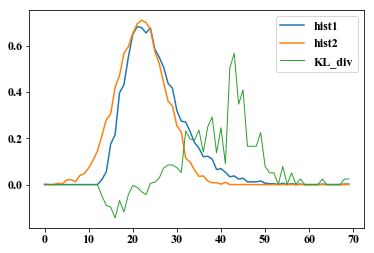

0.06682142451763125


In [29]:
print(KL_divergence_samples(G_samples, N_samples, plot=True))

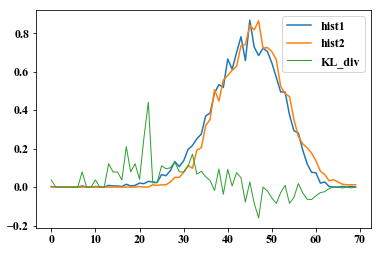

0.030943198157505885


In [30]:
print(KL_divergence_samples(G_samples_log, N_samples_log, plot=True))

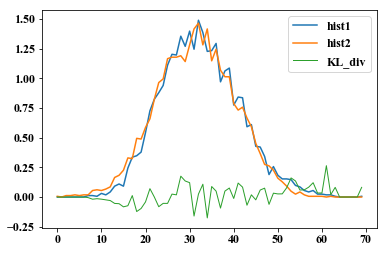

0.01695866913739373


In [31]:
print(KL_divergence_samples(G_samples_sqrt, N_samples_sqrt, plot=True))

In [32]:
def KL_div_samples_combinations(n_samples=10000, plot=False):
    
    #As = range(2, 12)
    #Ls = range(1, 11)
    As = [5,4,8]
    Ls = [1, 2, 3]

    KL_div = 0
    KL_div_t_sqrt = 0
    KL_div_t_log = 0 

    for a in As:
        for l in Ls:
            
            print("a: ", a, "l: ", l)
            
            #standard base
            mode = gamma_mode(a, l)
            sigma = np.sqrt(gamma_var(a, l))
            G_samples = gamma.rvs(a, scale=1/l, size=n_samples)
            N_samples = norm.rvs(mode, sigma, size=n_samples)
            
            #log base
            mode_log = gamma_t_log_mode(a, l)
            sigma_log = np.sqrt(gamma_t_log_var(a))
            G_samples_log = np.log(G_samples)
            N_samples_log = norm.rvs(mode_log, sigma_log, size=n_samples)
            
            #sqrt base
            mode_sqrt = gamma_t_sqrt_mode(a, l)
            sigma_sqrt = np.sqrt(gamma_t_sqrt_var(l))
            G_samples_sqrt = np.sqrt(G_samples)
            N_samples_sqrt = norm.rvs(mode1_sqrt, sigma_sqrt, size=n_samples)
             
            #add KL divs
            KL_div += KL_divergence_samples(G_samples, N_samples, plot=plot)
            KL_div_t_log += KL_divergence_samples(G_samples_log, N_samples_log, plot=plot)
            KL_div_t_sqrt += KL_divergence_samples(G_samples_sqrt, N_samples_sqrt, plot=plot)
            
    return(KL_div, KL_div_t_log, KL_div_t_sqrt)

a:  5 l:  1


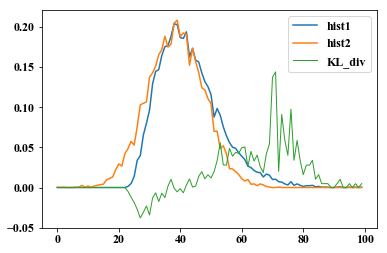

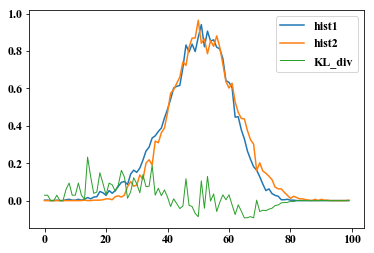

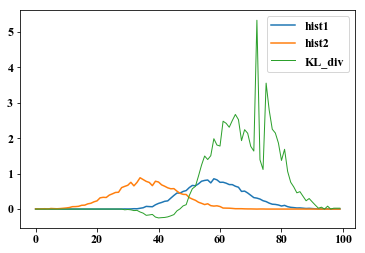

a:  5 l:  2


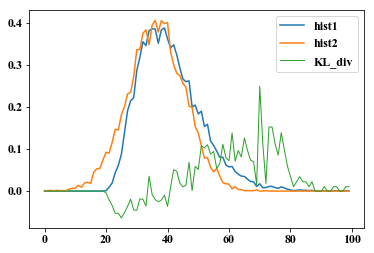

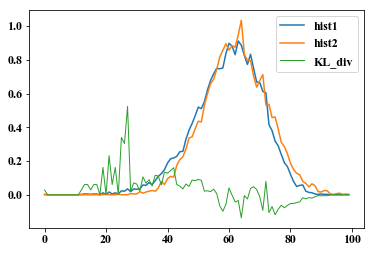

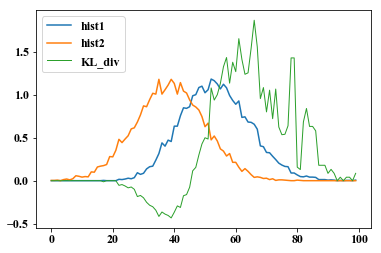

a:  5 l:  3


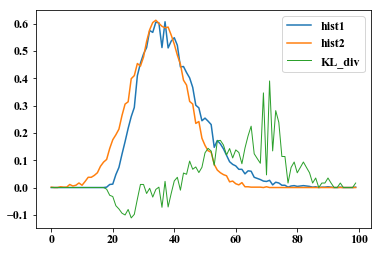

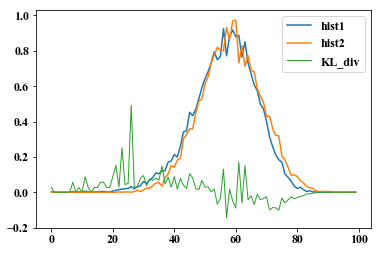

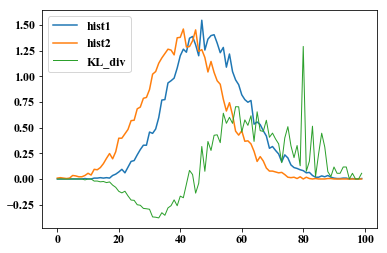

a:  4 l:  1


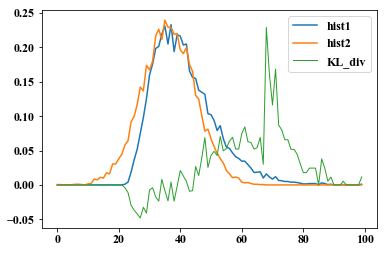

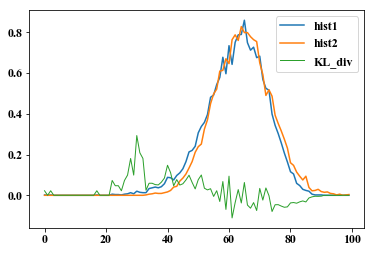

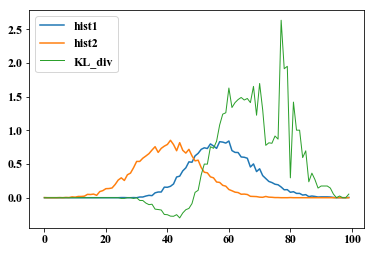

a:  4 l:  2


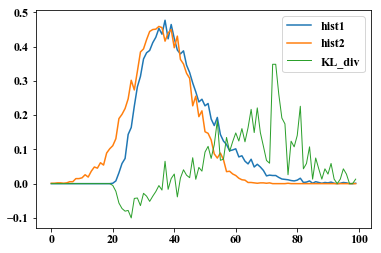

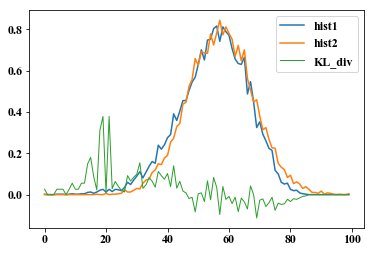

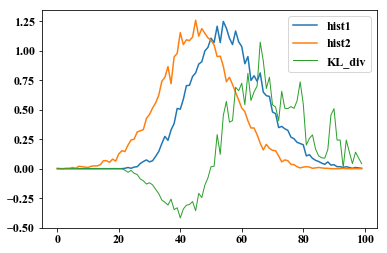

a:  4 l:  3


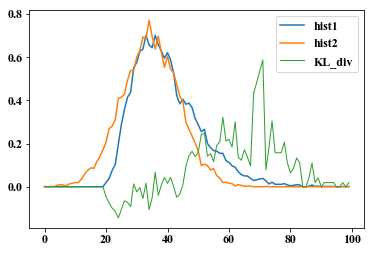

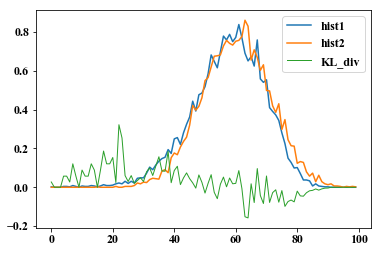

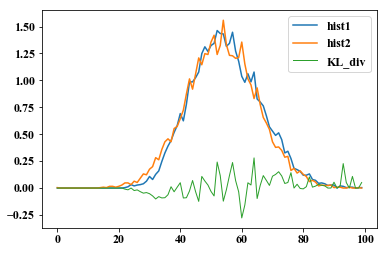

a:  8 l:  1


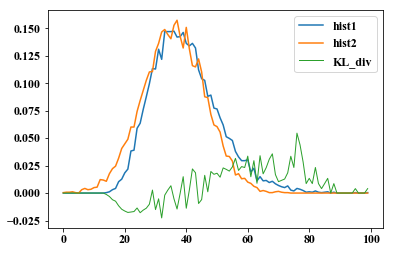

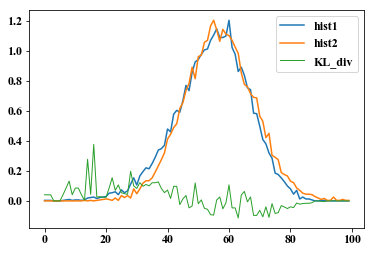

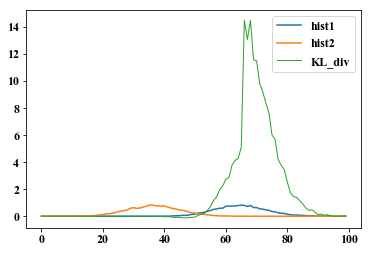

a:  8 l:  2


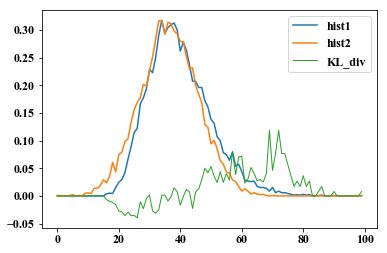

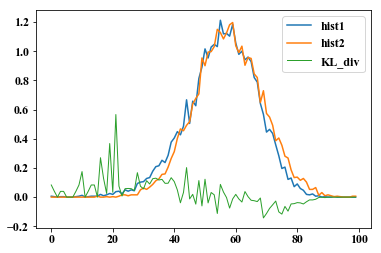

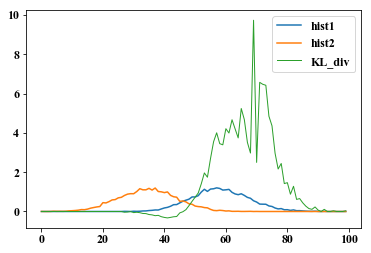

a:  8 l:  3


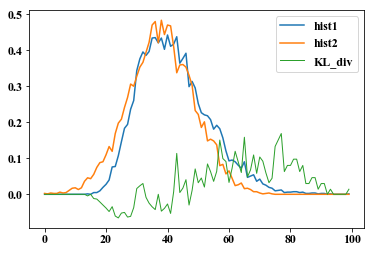

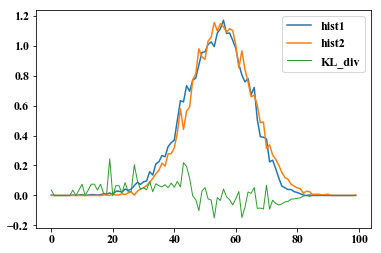

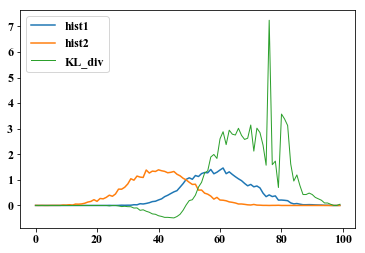

(0.27479485840089246, 0.2125508781772683, 5.2238482124696075)


In [33]:
print(KL_div_samples_combinations(n_samples=10000, plot=True))